Ouverture du csv des annotations  
changement des colonnes  
selection des audio notés, calcul de la moyenne  
chargement des fonctions  

In [1]:
%run audio_fonctions.ipynb
%run loading_data.ipynb

audio : 55
audio_only : 33
video : 44
texte : 55
texte_only : 33


#### liste des fichiers audio annotés

In [2]:
ratedScenes = sorted(list(set(audio['doc'])))
print(ratedScenes[0:10])

['100_1', '107_7', '108_3', '116_15', '128_5', '129_5', '12_13', '13_2', '147_1', '148_4']


### Librairies : Pybk, webTRC, SNR, énergie, ZCR, MFCC
score de reconnaissance son texte avec le CMU sphinx  
nombre de locuteurs en tout (et en même temps)  
SNR  
ligth gradient boosting (si pb de corrélation)  
accent ?  
lium speaker diarization (java) -> nombre de locuteur, (~segmentation parole/non parole)  





# Make features

#### sur les audio annotés :

In [3]:
ratedScenes = sorted(list(set(audio_only['doc'])))
all_scenes  = sorted(list(set(annot['doc'])))

method, smooth = 'silence', 'rolling_mean'
filename = './data/'+method+'_'+smooth+'.csv'

pas = 5
rated_scenes_chunks = [ratedScenes[s:s+pas] for s in range(0,len(ratedScenes),pas)]
all_scenes_chunks   = [all_scenes[s:s+pas]  for s in range(0,len(all_scenes),pas)]

df_features = pd.DataFrame(columns=['SCENE','SR','SNR','VBR','CONF','RECON','SCORE','XML'])

In [4]:
df_features = pd.read_csv(filename, sep='§', engine='python', index_col=0, encoding='utf-8')

In [5]:
for scenes in rated_scenes_chunks:
    df_features = make_audio_features(scenes, df=df_features, method=method, smooth=smooth)
    df_features.to_csv(filename, sep='§', encoding='utf-8')
    print(len(df_features), "/", len(ratedScenes))

100_1 0.572198275862069
107_7 0.82381280110117
108_3 0.529839883551674
128_5 0.5130890052356021
13_2 0.6129629629629629
5 / 33
147_1 0.7460701330108828
148_4 0.17518248175182483
165_10 0.5296208530805687
180_4 0.6052249637155298
186_2 0.37416107382550334
10 / 33
190_10 0.7788461538461539
197_7 0.8667917448405253
199_9 0.7430830039525692
19_13 0.6512651265126512
208_12 0.8472222222222222
15 / 33
210_3 0.5473289597000938
211_15 0.18271119842829076
221_7 0.8308333333333333
226_6 0.7868061142397426
231_13 0.6896551724137931
20 / 33
253_11 0.2865671641791045
271_14 0.17611336032388664
274_9 0.6125760649087221
278_14 0.22270363951473138
291_8 0.2082670906200318
25 / 33
29_12 0.6714801444043321
2_4 0.09523809523809523
45_14 0.28197226502311246
57_6 0.31351351351351353
65_11 0.2910344827586207
30 / 33
72_2 0.5551102204408818
79_8 0.263681592039801
80_9 0.7836538461538461
33 / 33


#### sur toutes les data :

In [6]:
#df_features = pd.read_csv(filename, sep='§', engine='python', index_col=0, encoding='utf-8')

In [7]:
for scenes in all_scenes_chunks:
    #print(scenes)
    df_features = make_audio_features(scenes, df=df_features, method=method, smooth=smooth)
    df_features.to_csv(filename, sep='§', encoding='utf-8')
    print(len(df_features), "/", len(all_scenes))

101_7 0.5975
102_8 0.4909365558912387
103_13 0.5980487804878049
104_6 0.41095238095238096
37 / 300
105_14 0.14945054945054945
106_2 0.6921944035346097
109_13 0.7517241379310344
40 / 300
10_15 0.19855072463768117
110_2 0.5684647302904564
111_10 0.6523364485981309
112_8 0.2672955974842767
113_11 0.7334801762114538
45 / 300
114_12 0.9094076655052264
115_14 0.43711340206185567
116_15 0.24890829694323144
117_9 0.5385365853658537
118_13 0.6107328794553464
50 / 300
119_8 0.3277310924369748
11_2 0.7042801556420234
120_7 0.6094420600858369
121_13 0.7354260089686099
122_2 0.3732876712328767
55 / 300
123_2 0.19230769230769232
124_13 0.7682639434406913
125_2 0.38764044943820225
126_13 0.939297124600639
127_9 0.4732824427480916
60 / 300
129_5 0.781010719754977
12_13 0.8558352402745996
130_14 0.6218181818181818
131_13 0.48753117206982544
64 / 300
132_3 0.5976331360946746
133_3 0.3497854077253219
134_2 0.6471518987341772
135_2 0.31363636363636366
136_5 0.5434380776340111
69 / 300
137_15 0.29918032786

/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:357: RuntimeWarning: Mean of empty slice.
/home/david/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1_13 1.0
200_4 0.15702479338842976
201_10 0.6804347826086956
202_9 0.5165394402035624
203_2 0.4542372881355932
134 / 300
204_2 0.1589958158995816
205_9 0.12742980561555076
206_8 0.42078364565587734
207_12 0.6871345029239766
138 / 300
209_1 0.2008324661810614
20_1 0.6982570806100218
212_6 0.6302952503209243
141 / 300
213_15 0.20612813370473537
214_14 0.31856540084388185
215_13 0.7848275862068965
216_2 0.6116071428571429
217_2 0.5128205128205128
146 / 300
218_10 0.7018633540372671
219_10 0.7461832061068703
21_15 0.2425
220_2 0.5168539325842697
150 / 300
222_15 0.23647604327666152
223_11 0.22130177514792898
224_15 0.17424242424242425
225_11 0.4264705882352941
154 / 300
227_3 0.5273775216138329
228_9 0.5517241379310345
229_1 0.557909604519774
22_3 0.33415233415233414
230_4 0.21993127147766323
159 / 300
232_13 0.7303703703703703
233_13 0.4357459379615953
234_8 0.23109243697478993
235_1 0.37612768910478833
163 / 300
236_15 0.3626373626373626
237_14 0.28169014084507044
238_13 0.66719242902208

In [6]:
df_features.head(50)

,SCENE,SR,SNR,VBR,CONF,RECON,SCORE,XML
0,100_1,0.506749,0.975847,0.762667,0.906647,Bonsoir je te dirai quoi faire tu es pas série...,0.572198,Bonsoir Tu veux pas te garer Pour quoi faire M...
1,107_7,0.875052,0.992874,0.982001,NaN,maintenant c'est normal excuse-moi parce que j...,0.823813,Qu est ce qui se passe Vous en faites un bouca...
2,108_3,0.610753,0.950284,0.936133,0.895083,les pantalons à côté de la plaque et vous ment...,0.529840,Quoi Une chorale Oui Mon pauvre Mathieu vous ê...
3,128_5,0.636332,0.998066,0.914602,0.881871,tu as remarqué comme les mises en clair normal...,0.513089,T as remarqué comme les nuits sont claires Nor...
4,13_2,0.784851,0.995663,0.864193,NaN,sûrement une petite idée de ce qu'elle était e...,0.612963,Dites moi monsieur Pire Tina Lombardi vous avi...
5,147_1,0.763903,0.998051,0.932642,NaN,c'est pas du tout ce que tu crois qu'est-ce qu...,0.746070,Non Jean Pierre c est pas du tout ce que tu cr...
6,148_4,0.524447,0.999811,0.905907,0.892375,la leçon d'aujourd'hui Portet sur les flammes ...,0.175182,Asseyez vous Silence Bien Alors la leçon d auj...
7,165_10,0.696862,0.999677,0.810926,NaN,je connais tu vas passer une mauvaise nuit app...,0.529621,On y va Je vous préviens qu il a passé une mau...
8,180_4,0.744763,0.997982,0.864103,0.895173,oui ah oui c'est moi un élément comment ça sur...,0.605225,Oui Francis Leborgne Bah oui c est moi oui C e...
9,186_2,0.356161,0.997102,0.461737,0.884650,scanner avec canon plus que moi c'est maintena...,0.374161,Toi qui crânais avec tes un an de plus que moi...


In [14]:
df_features.loc[297,['RECON']].values

array(["appeler Marie la meilleure de la maison c'est normal la même famille chambre très humide musique trouver un autre tu sais"],
      dtype=object)

# Tests

#### SNR (crapy for now)

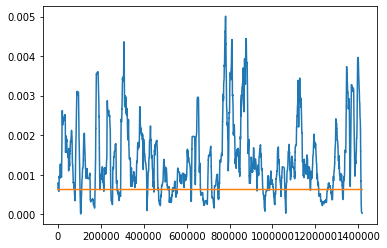

In [9]:
scene = '226_6'
file = dir_audio + scene + audio_extension
signal, fe = librosa.load(file, sr=samplerate, mono=True)

energy = (pd.Series(signal)**2).rolling(window=fe, min_periods=2, center=True).mean()

s = pd.Series(signal)
energy = (s**2).rolling(window=fe, min_periods=2, center=True).mean()
min_E = min(energy)
min_E = np.percentile(energy, 5)
plt.plot(energy)
f = 2
plt.plot([f * min_E] * len(energy))
plt.show()